In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

In [4]:
merged_data['Region_encoded'] = merged_data['Region'].astype('category').cat.codes
merged_data['Category_encoded'] = merged_data['Category'].astype('category').cat.codes

In [5]:
clustering_data = merged_data.groupby('CustomerID').agg({
    'Region_encoded': 'first',
    'Category_encoded': 'mean',
    'Price_y': 'mean',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [6]:
clustering_features = clustering_data.drop(columns=['CustomerID'])

In [7]:
scaler = MinMaxScaler()
normalized_clustering_features = scaler.fit_transform(clustering_features)

In [8]:
db_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(normalized_clustering_features)
    db_score = davies_bouldin_score(normalized_clustering_features, labels)
    db_scores.append(db_score)

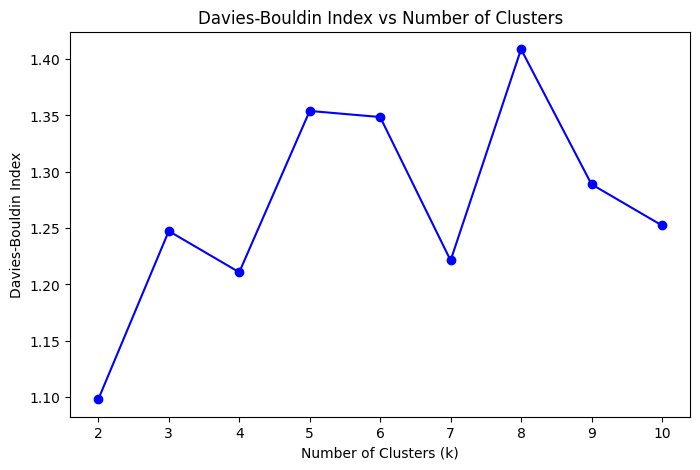

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, db_scores, marker='o', linestyle='-', color='b')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.xticks(k_values)
plt.show()

In [10]:
optimal_k = k_values[db_scores.index(min(db_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(normalized_clustering_features)


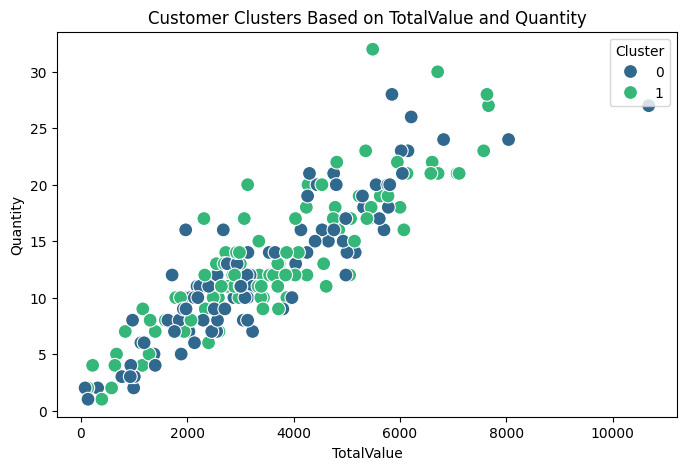

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=clustering_data['TotalValue'],
    y=clustering_data['Quantity'],
    hue=clustering_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer Clusters Based on TotalValue and Quantity")
plt.xlabel("TotalValue")
plt.ylabel("Quantity")
plt.legend(title="Cluster")
plt.show()

In [12]:
final_db_index = davies_bouldin_score(normalized_clustering_features, clustering_data['Cluster'])

In [13]:
clustering_summary = {
    "Number of Clusters": optimal_k,
    "Davies-Bouldin Index": final_db_index
}
print("Clustering Summary:", clustering_summary)

Clustering Summary: {'Number of Clusters': 2, 'Davies-Bouldin Index': 1.098088027707761}


In [14]:
clustering_summary_df = clustering_data[['CustomerID', 'Cluster']]
clustering_summary_df.to_csv('Kumar_Shivam_Clustering.csv', index=False)